In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

In [2]:
customersegmentation=pd.read_csv('/kaggle/input/wine-customer-segmentation/Wine.csv')

In [3]:
customersegmentation.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
customersegmentation.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,3


In [5]:
customersegmentation.shape

(178, 14)

In [45]:
customersegmentation.columns

Index(['Alkol', 'MalikAsit', 'Kül', 'AshAlkali', 'Magnezyum', 'ToplamFenol',
       'Flavanoidler', 'NonflavanoidFenol', 'proantosiyaninler',
       'RenkYoğunluğu', 'RenkTonu', 'OD280', 'prolin', 'MüşteriSegmentasyonu'],
      dtype='object')

In [46]:
customersegmentation.head()

,Alkol,MalikAsit,Kül,AshAlkali,Magnezyum,ToplamFenol,Flavanoidler,NonflavanoidFenol,proantosiyaninler,RenkYoğunluğu,RenkTonu,OD280,prolin,MüşteriSegmentasyonu
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [9]:
customersegmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alkol                 178 non-null    float64
 1   MalikAsit             178 non-null    float64
 2   Kül                   178 non-null    float64
 3   AshAlkali             178 non-null    float64
 4   Magnezyum             178 non-null    int64  
 5   ToplamFenol           178 non-null    float64
 6   Flavanoidler          178 non-null    float64
 7   NonflavanoidFenol     178 non-null    float64
 8   proantosiyaninler     178 non-null    float64
 9   RenkYoğunluğu         178 non-null    float64
 10  RenkTonu              178 non-null    float64
 11  OD280                 178 non-null    float64
 12  prolin                178 non-null    int64  
 13  MüşteriSegmentasyonu  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
customersegmentation.isnull().sum()

Alkol                   0
MalikAsit               0
Kül                     0
AshAlkali               0
Magnezyum               0
ToplamFenol             0
Flavanoidler            0
NonflavanoidFenol       0
proantosiyaninler       0
RenkYoğunluğu           0
RenkTonu                0
OD280                   0
prolin                  0
MüşteriSegmentasyonu    0
dtype: int64

In [11]:
customersegmentation.describe().T

,count,mean,std,min,25%,50%,75%,max
Alkol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
MalikAsit,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Kül,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
AshAlkali,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnezyum,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
ToplamFenol,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoidler,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NonflavanoidFenol,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proantosiyaninler,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
RenkYoğunluğu,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [12]:
corr=customersegmentation.corr()
corr

,Alkol,MalikAsit,Kül,AshAlkali,Magnezyum,ToplamFenol,Flavanoidler,NonflavanoidFenol,proantosiyaninler,RenkYoğunluğu,RenkTonu,OD280,prolin,MüşteriSegmentasyonu
Alkol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
MalikAsit,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Kül,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
AshAlkali,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnezyum,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
ToplamFenol,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoidler,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
NonflavanoidFenol,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proantosiyaninler,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
RenkYoğunluğu,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

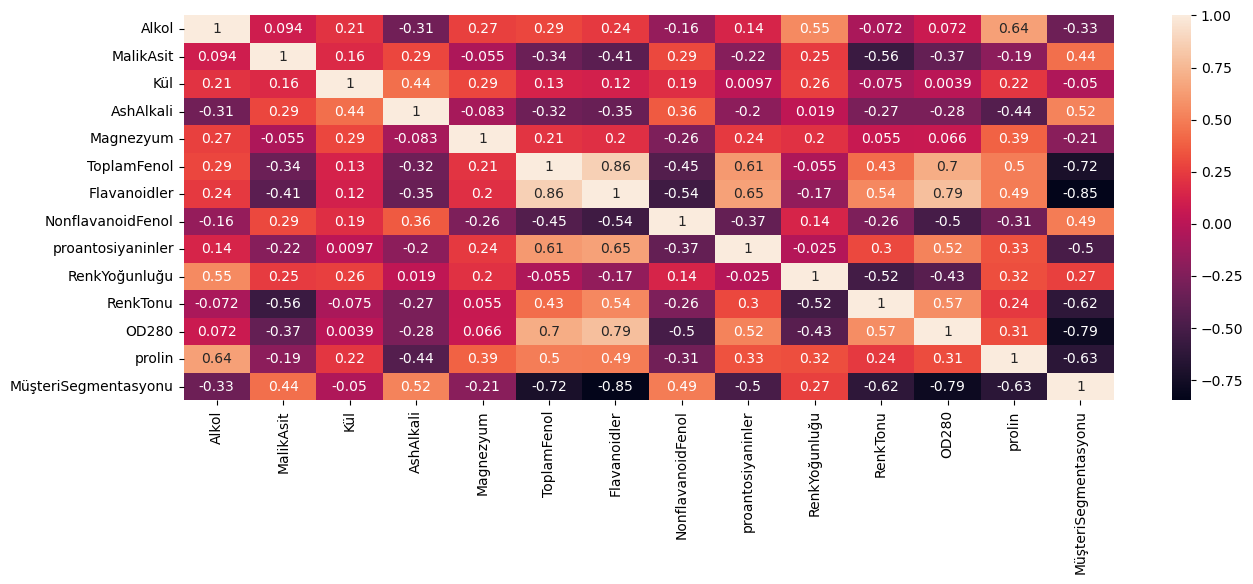

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

<Axes: xlabel='ToplamFenol', ylabel='Flavanoidler'>

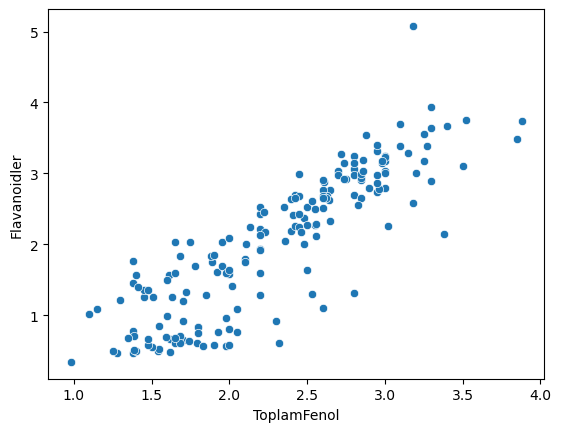

In [14]:
sns.scatterplot(x='ToplamFenol', y='Flavanoidler', data=customersegmentation)

<Axes: xlabel='ToplamFenol', ylabel='Flavanoidler'>

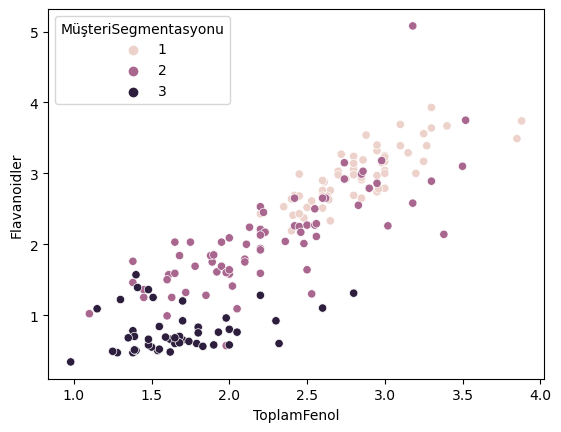

In [15]:
sns.scatterplot(x='ToplamFenol', y='Flavanoidler',hue='MüşteriSegmentasyonu', data=customersegmentation)

In [16]:
customersegmentation['MüşteriSegmentasyonu'].value_counts()

2    71
1    59
3    48
Name: MüşteriSegmentasyonu, dtype: int64

<Axes: xlabel='MüşteriSegmentasyonu', ylabel='count'>

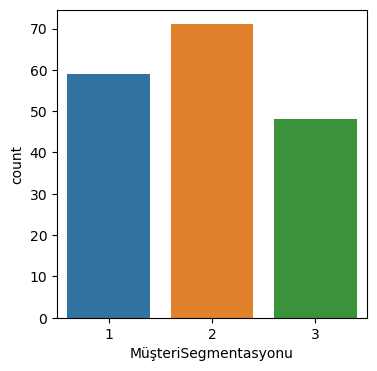

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x='MüşteriSegmentasyonu', data=customersegmentation)

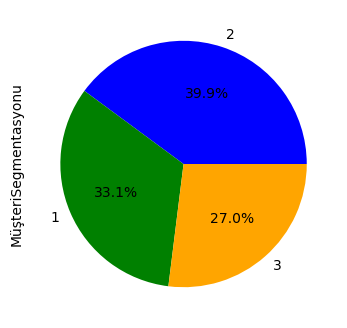

In [18]:
plt.figure(figsize=(4,4))
colors=['blue','green','orange']
customersegmentation.MüşteriSegmentasyonu.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

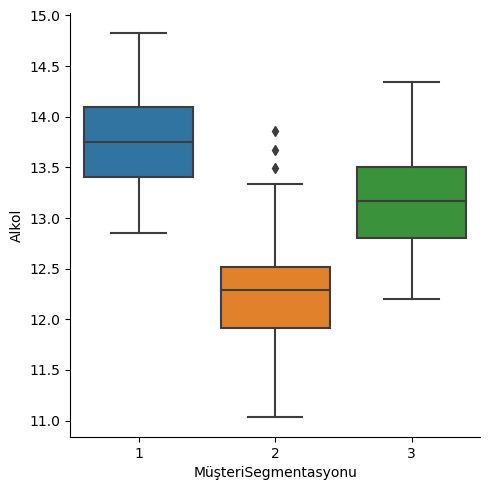

In [19]:
sns.catplot(x='MüşteriSegmentasyonu', y='Alkol', data=customersegmentation, kind='box')

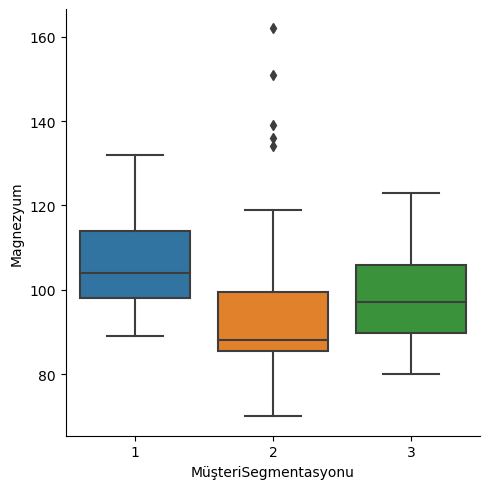

In [20]:
sns.catplot(x='MüşteriSegmentasyonu', y='Magnezyum', data=customersegmentation, kind='box')

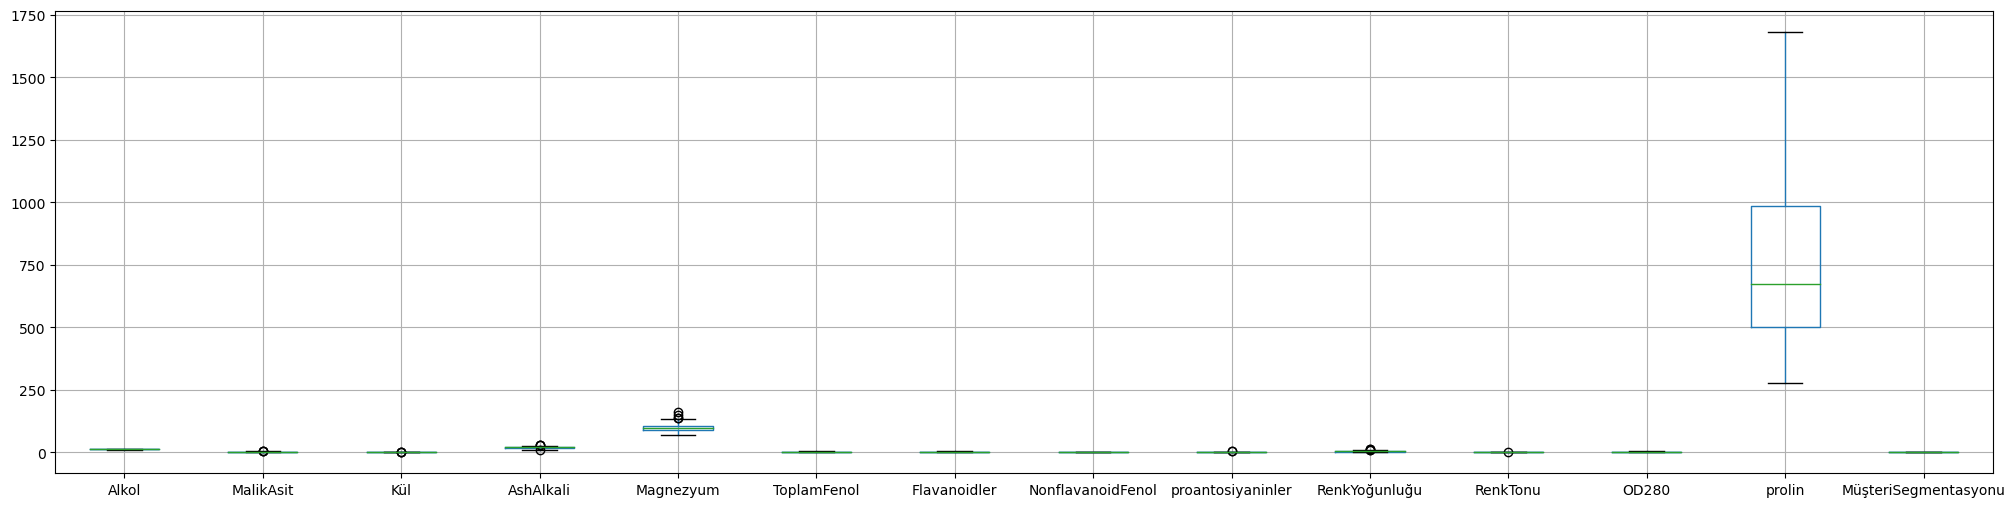

In [21]:
customersegmentation.boxplot(figsize=(25,6))
plt.show()

<Figure size 500x2000 with 0 Axes>

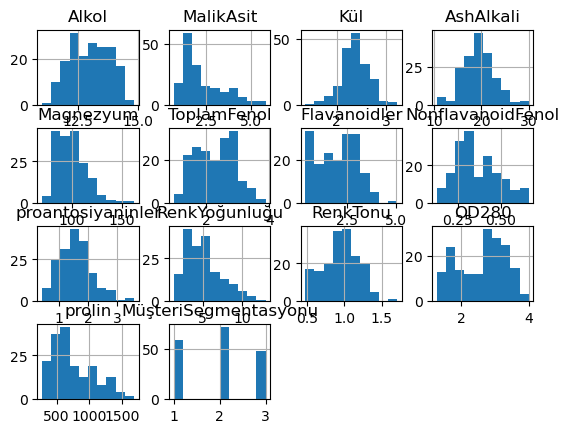

In [22]:
plt.figure(figsize=(5,20))
customersegmentation.hist()
plt.show()

In [23]:
x=customersegmentation.drop('MüşteriSegmentasyonu', axis=1).values
y=customersegmentation['MüşteriSegmentasyonu'].values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10, random_state=0)

In [25]:
model=RandomForestClassifier(random_state=0)

In [26]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
y_pred=model.predict(x_test)

In [28]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[6 0 0]
 [0 7 0]
 [0 0 5]]


<Axes: >

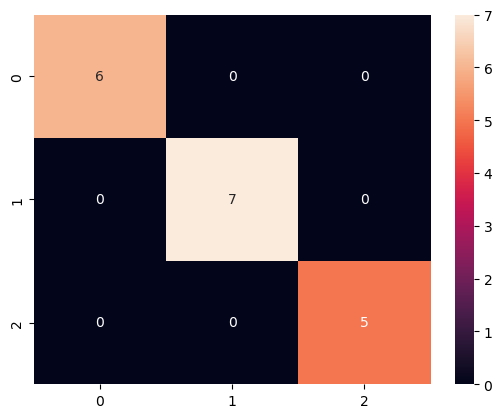

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [30]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [32]:
classifier = DecisionTreeClassifier()

In [33]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred=classifier.predict(x_test)

In [35]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[6 0 0]
 [1 6 0]
 [0 0 5]]


<Axes: >

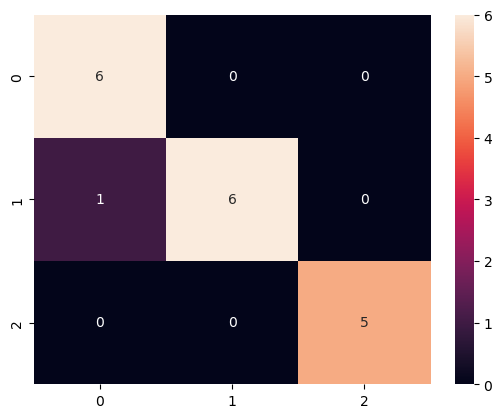

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         5

    accuracy                           0.94        18
   macro avg       0.95      0.95      0.95        18
weighted avg       0.95      0.94      0.94        18



In [38]:
logr=LogisticRegression(random_state=0)

In [39]:
logr.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [40]:
y_pred=logr.predict(x_test)

In [41]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[6 0 0]
 [0 7 0]
 [0 0 5]]


<Axes: >

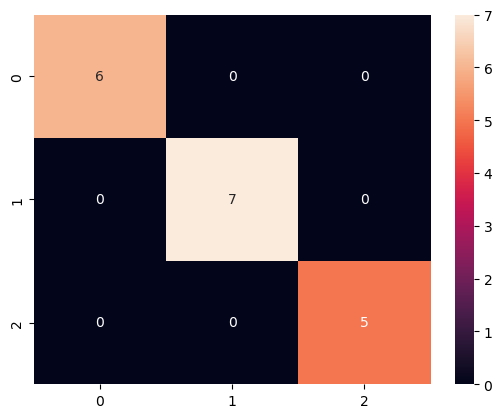

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [43]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

